In [7]:
## Modules
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# Load dataset
uber_trips_2014 = pd.read_csv('uber_trips_2014.csv')
uber_trips_2015 = pd.read_csv('uber_trips_2015.csv')

In [3]:
# Uber 2014 
new = uber_trips_2014['pickup_datetime'].str.split(" ", n = 1, expand = True)
new2 = new[0].str.split("/", n = 2, expand = True)
ano = ['20'+i  if len(i) == 2 else i for i in new2[2]]
uber_trips_2014['YYMM'] = ano[0] + '0' + new2[0]
uber_2014 = uber_trips_2014.groupby(['YYMM'])['YYMM'].count()

In [5]:
# Uber 2015
uber_trips_2015['pickup_datetime']= pd.to_datetime(uber_trips_2015['pickup_datetime'], format='%Y-%m-%d')
uber_trips_2015['pickup_YYMM'] = uber_trips_2015['pickup_datetime'].map(lambda x: 100*x.year + x.month)
uber_2015 = uber_trips_2015.groupby(['pickup_YYMM'])['pickup_YYMM'].count()

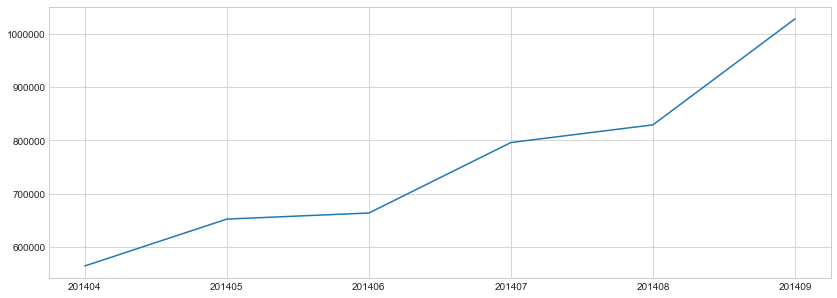

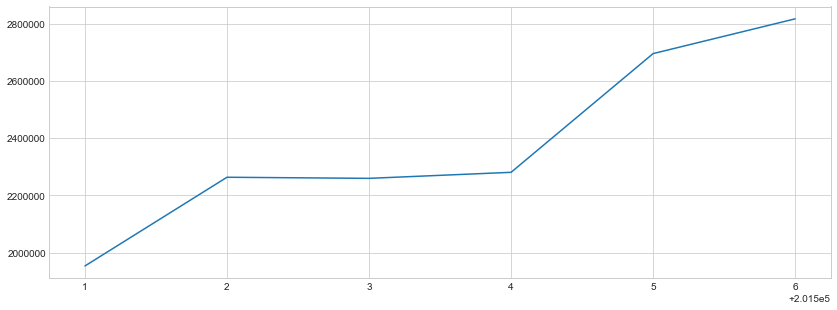

In [8]:
# Line plots
plt.figure(figsize=(14,5))
plt.plot(uber_2014.index,uber_2014)
plt.figure(figsize=(14,5))
plt.plot(uber_2015.index,uber_2015)